# 🎲 Random Walk 🚶‍♂️

You do not trust this calculation? Let us try to check it by a simple computer
simulation. For each n chosen in advance, start with a particle at the origin, then
randomly add $+1$ or $−1$ to its current position and write down its final coordinate
after $2n$ steps. A walk that ends up at $x = 0$ and has never erred into $x < 0$ is counted
as “good”. If for each n we repeat N walks, we may expect that the ratio of the
good walks and all attempted walks will approach the calculated probability (1.18)
in the limit $N \rightarrow \infty$. Let us denote this simulated probability by $P_{sim}(AB)$. Figure 1.5
(right) shows the ratio between $P_{sim}(AB)$ and the theoretical $P(AB)$ as a function of
the walk duration n for three different numbers N of how many times the simulation
was re-run. Apparently our calculation was correct: with increasing $N$ the ratio does
stabilize near $1$. The thick line in the figure still looks wiggly? It is! Recall that for
n = 80 there are $2160 \thickapprox 1048$ all possible walks, while we have performed only a
million of them at each $n$.

Exercise 1.5.7 *Probability For Physicists Simon Sirca 2016* One-Dimensional Random Walk

## Probability event AB whit N random walks

CPU times: total: 703 ms
Wall time: 932 ms


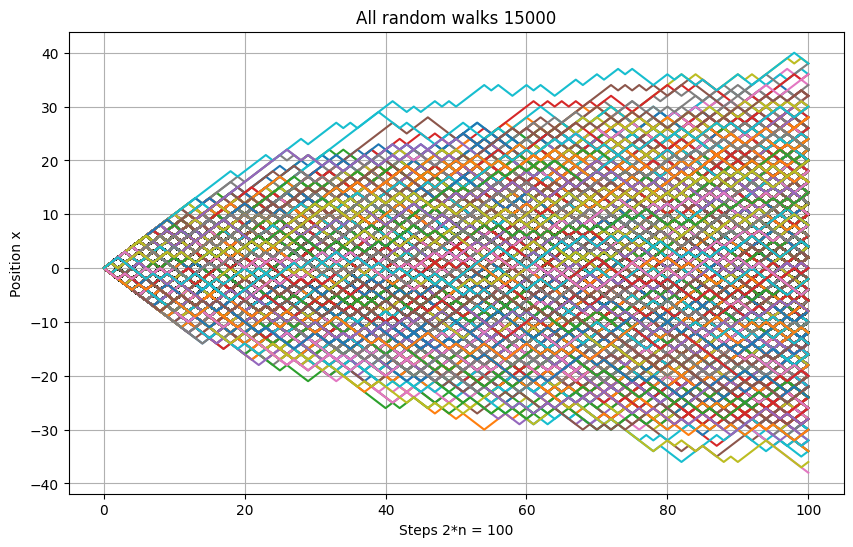

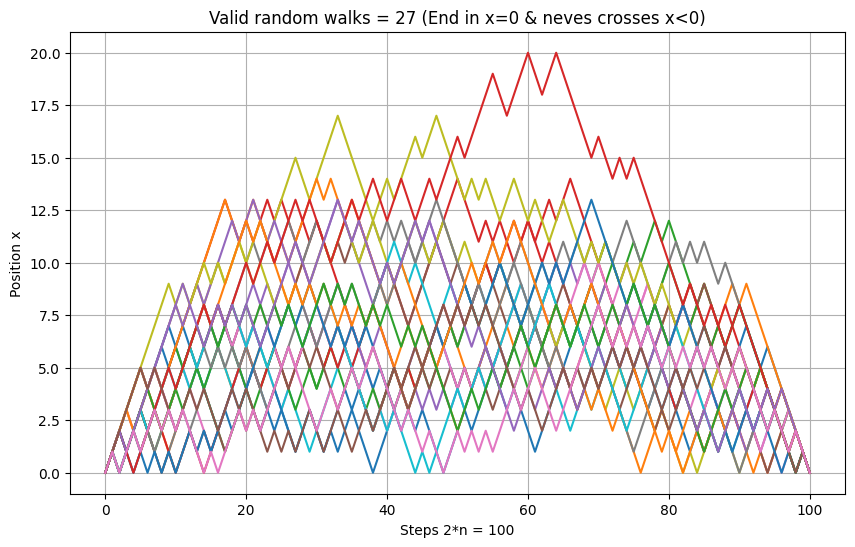

Generated random walks: 15000
Valid random walks: 27
Probability of valid random walks: 0.0018


In [9]:
#==================================================================================
#Import Libraries
#==================================================================================

import numpy as np
import matplotlib.pyplot as plt
import itertools

#==================================================================================
#Def Random Walk Model
#==================================================================================

def Random_Walk_1D(n):
    """"Generate a random walk in 1D with 2n steps"""
    Posibility = [-1, 1]
    Step = np.random.choice(Posibility, size=2*n)
    Position = np.cumsum(Step)  # Random walk position to know if it crosses x<0
    return(Position)

def FulFills_Walk(Position):
    """Check if the walk is valid, ends x=0 & never crosses x<0"""
    return(Position[-1] == 0 and np.all(Position >= 0))

def Walk_Generator(N,n):
    """Generates N random walks & count how many are valid"""
    Walks = []  #Here save all random walks
    Valid_Walks = []    #Here save only valid walks

    for _ in range (N):
        Position = Random_Walk_1D(n)
        Walks.append(Position)
        if FulFills_Walk(Position):
            Valid_Walks.append(Position)

    return(Walks, Valid_Walks)

def Plot_Walks(Walks, title):
    """Walks Plot"""
    plt.figure(figsize=(10, 6))
    for Position in Walks:
        x = np.arange(len(Position) + 1)
        y = np.insert(Position, 0, 0)   #Insert origin at beginning
        plt.plot(x, y)

    plt.title(title)
    plt.xlabel(f'Steps 2*n = {2*n}')
    plt.ylabel('Position x')
    plt.grid(True)
    plt.show()

#==================================================================================
#Input
#==================================================================================

N = 15000    #Number of walks to generate
n = 50  #Number of steps (2n steps)
seed = 777

#Set a seed for replicate

np.random.seed(seed)

#Generate Walks & count valid walks
%time Walks_1, Valid_Walks_1 = Walk_Generator(N, n)

#==================================================================================
#Print
#==================================================================================

#Plot all random walks
Plot_Walks(Walks_1, f"All random walks {N}")

#Plot only valid walks
if Valid_Walks_1:
    Plot_Walks(Valid_Walks_1, f"Valid random walks = {len(Valid_Walks_1)} (End in x=0 & neves crosses x<0)")
else:
    print("No valid walks were generated.")

#Probability calculate

Probability = len(Valid_Walks_1) / N

print(f"Generated random walks: {N}")
print(f"Valid random walks: {len(Valid_Walks_1)}")
print(f"Probability of valid random walks: {Probability}")

## Ratio between $P_{sim}(AB)$ & $P_{theoretical}(AB)$

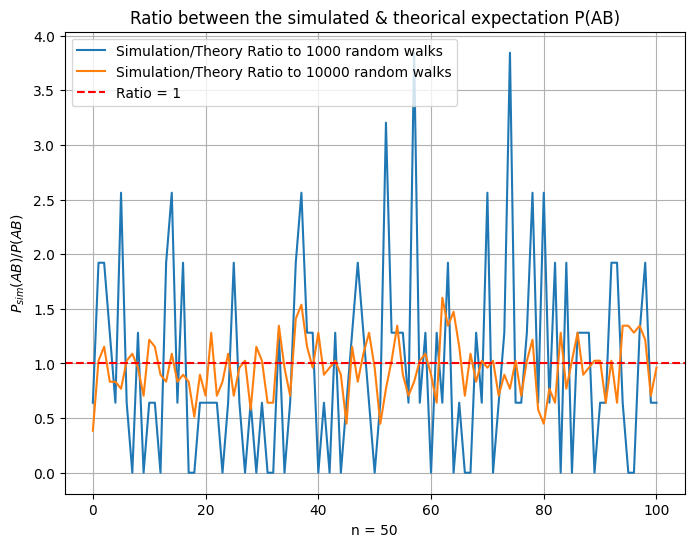

In [83]:
# Theoretical probability P(AB)
P_AB_theoretical = 0.00156057328    #Teorical Value

# Different values of N
n_Values = np.arange(0, 2*n +1)
N_values = [1000, 10000]
Ratios = []

#==================================================================================
# Simulation and Ratio Calculation
#==================================================================================

for N_R in N_values:
    ratios = []
    for _ in range (0, len(n_Values)):
        # Generate Walks & count valid walks to unique N random walks
        _, Valid_Walks = Walk_Generator(N_R, n)
        
        # Probability calculated in simulation
        P_sim_AB = len(Valid_Walks) / N_R
        
        # Calculate the ratio P_sim(AB)/P(AB)
        ratio = P_sim_AB / P_AB_theoretical
        ratios.append(ratio)
    Ratios.append(ratios)

#==================================================================================
# Plot the Ratio
#==================================================================================

plt.figure(figsize=(8, 6))
for _ in range(0, len(Ratios)): #Generate a graph for each
    plt.plot(n_Values, Ratios[_], linestyle='-', label=f'Simulation/Theory Ratio to {N_values[_]} random walks')
plt.axhline(y=1, color='r', linestyle='--', label='Ratio = 1')
plt.xlabel(f'n = {n}')
plt.ylabel(r'$P_{sim}(AB) / P(AB)$')
plt.title(r'Ratio between the simulated & theorical expectation P(AB)')
plt.legend()
plt.grid(True)
plt.show()

## All possible random walks

⚠ Be careful how many steps $(n)$ you choose, since for this case, the computational power was not able to execute the code for $n<15$! ⚠

CPU times: total: 15.6 ms
Wall time: 9 ms


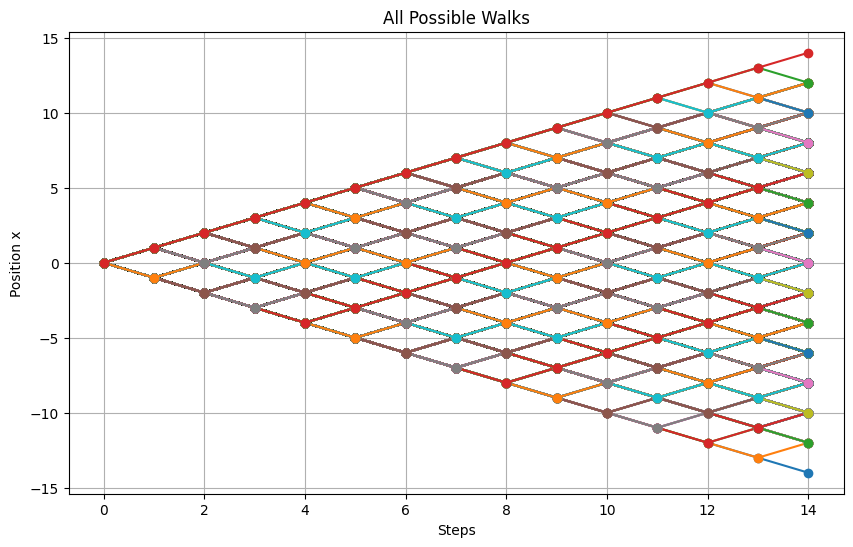

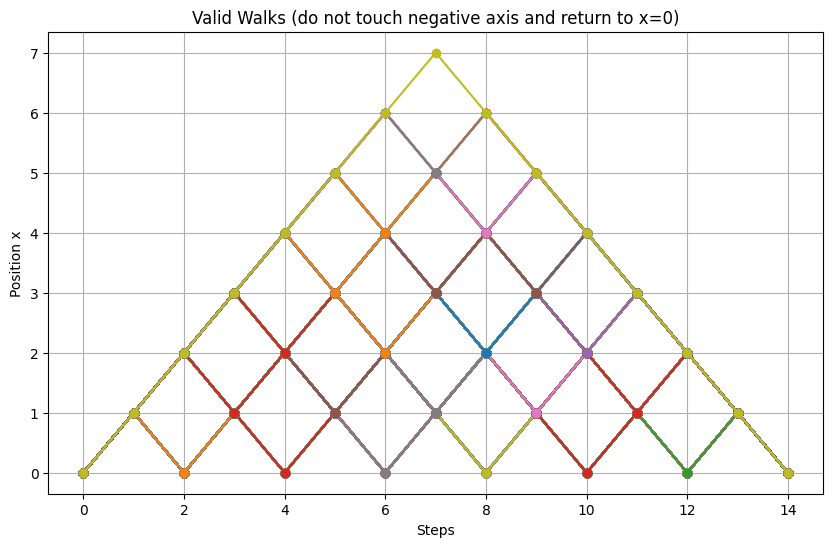

Total possible walks: 16384
Total valid walks: 429
Probability: 0.02618408203125


In [33]:
#==================================================================================
#Def Function
#==================================================================================

def is_valid_walk(walk):
    position = 0
    for step in walk:
        position += step
        if position < 0:  # Touches the negative axis
            return False
    return position == 0  # Returns to the origin

def count_valid_walks(n):
    # Generate all possible walks
    steps = [-1, 1]  # -1 = left, 1 = right
    possible_walks = itertools.product(steps, repeat=2*n)
    
    valid_walks = []
    total_walks = []
    
    for walk in possible_walks:
        total_walks.append(walk)
        if is_valid_walk(walk):
            valid_walks.append(walk)
    
    return valid_walks, total_walks

def plot_walks(walks, title):
    plt.figure(figsize=(10, 6))
    for walk in walks:
        x = range(len(walk) + 1)
        y = [0]  # Start at position 0
        position = 0
        for step in walk:
            position += step
            y.append(position)
        plt.plot(x, y, marker='o')
    
    plt.title(title)
    plt.xlabel('Steps')
    plt.ylabel('Position x')
    plt.grid(True)
    plt.show()

#==================================================================================
#Input
#==================================================================================

n = 7  # For 2n = 14 steps
%time valid_walks, total_walks = count_valid_walks(n)

#==================================================================================
#Print
#==================================================================================

# Plot all possible walks
plot_walks(total_walks, "All Possible Walks")

# Plot only the valid walks
plot_walks(valid_walks, "Valid Walks (do not touch negative axis and return to x=0)")

print(f"Total possible walks: {len(total_walks)}")
print(f"Total valid walks: {len(valid_walks)}")
print(f"Probability: {len(valid_walks) / len(total_walks)}")


